<h1>Parkinsons Disease</h1>
<h3>Data Set Information:</h3>
<p style="font-size:18px">This dataset depicts real data and is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD. This is a classification that I use for my choice of algorithm.
<br>
<br>
In this tutorial I will use the Decision Trees algorithm.</p>
<h3>Attribute Information:</h3>

<p style="font-size:18px">name - ASCII subject name and recording number.<br>
MDVP:Fo(Hz) - Average vocal fundamental frequency.<br>
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency.<br>
MDVP:Flo(Hz) - Minimum vocal fundamental frequency.<br>
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency.<br>
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude.<br>
NHR,HNR - Two measures of ratio of noise to tonal components in the voice.<br>
status - Health status of the subject (one) - Parkinson's, (zero) - healthy.<br>
RPDE,D2 - Two nonlinear dynamical complexity measures.<br>
DFA - Signal fractal scaling exponent.<br>
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation.<br> 
<br>
<p style="font-size:18px">Data set avaible on UCI: Machine Learning.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import mglearn as mgl

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("parkinsons.data", header=0)

In [3]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

<p style="font-size:18px">The table consists of 195 entries and 24 columns.</p> 

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [6]:
data.drop("name", axis=1, inplace=True)

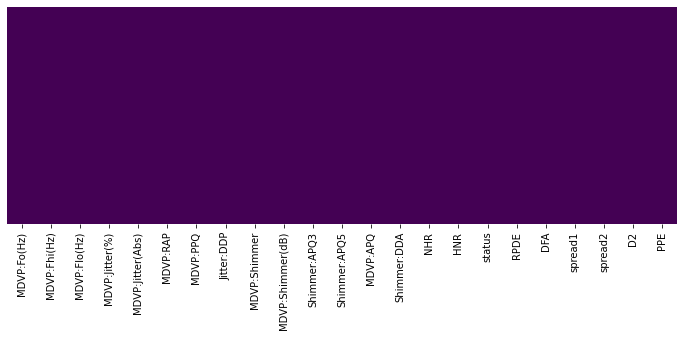

In [7]:
plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis',yticklabels=False)

<p style="font-size:18px">The table is ready for the work.</p>

<h3>Explorativ Analysis</h3>

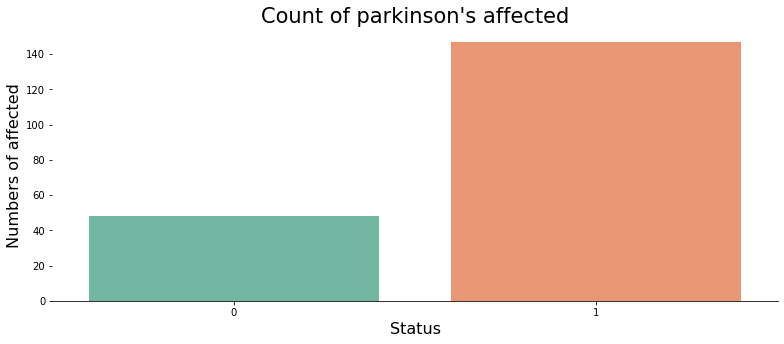

In [8]:
ax=sns.countplot(data=data, x="status", palette="Set2")
ax.set_title("Count of parkinson's affected", fontsize=21)
ax.set_xlabel("Status", fontsize=16)
ax.set_ylabel("Numbers of affected", fontsize=16)
fig=plt.gcf()
fig.set_size_inches(13,5)
sns.despine(left=True)

<p style="font-size:18px">48 patients are healthy. 147 patients have Parkinson's disease.</p>

In [9]:
feature_names = list(data.columns.values)
del feature_names[16]
feature_names_arr = np.array(feature_names)

In [10]:
data_arr = data.drop(["status"], axis=1).to_numpy()

In [11]:
status = data["status"]
status = status.to_numpy()
status

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

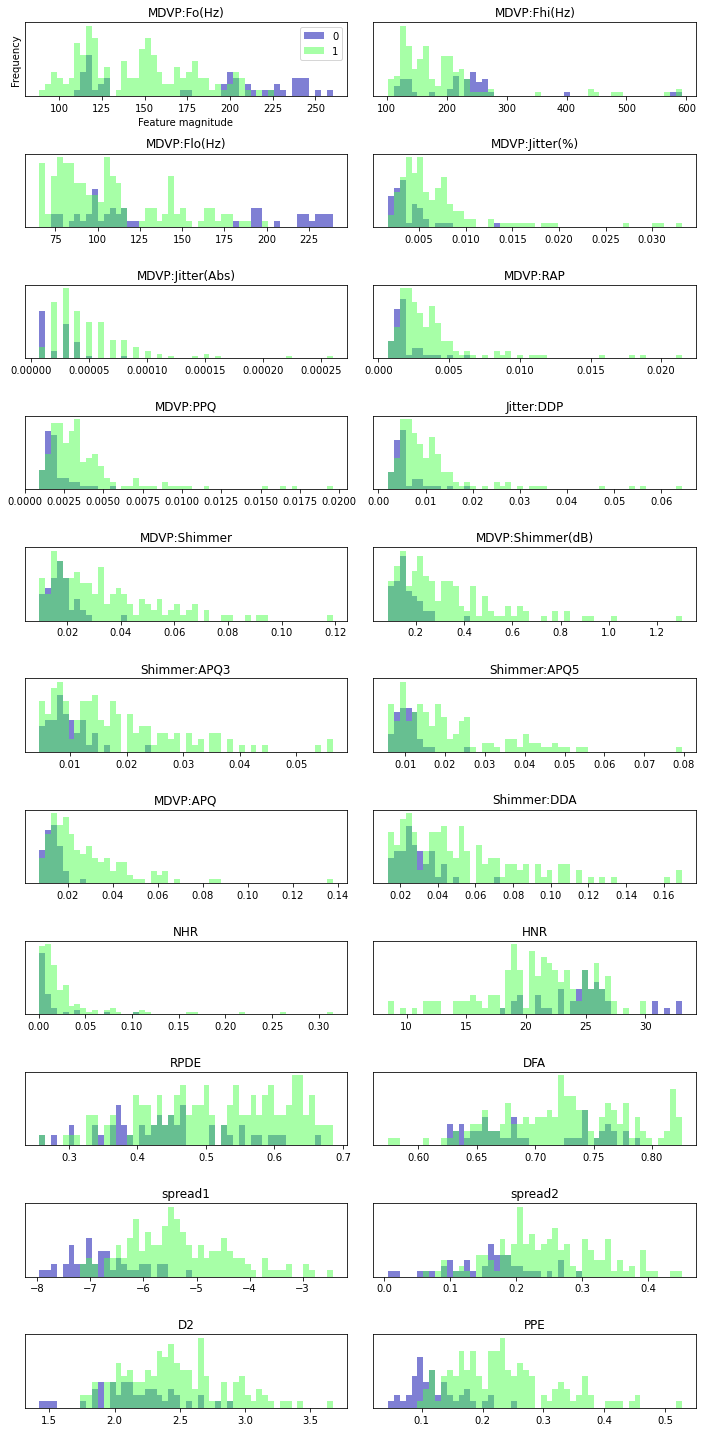

In [12]:
fig, axes = plt.subplots(11, 2, figsize=(10, 20)) 
status_0 = data_arr[status == 0]
status_1 = data_arr[status == 1]

ax = axes.ravel()

for i in range(22): 
    _, bins = np.histogram(data_arr[:, i], bins=50)
    ax[i].hist(status_0[:, i], bins=bins, color=mgl.cm3(0), alpha=.5)
    ax[i].hist(status_1[:, i], bins=bins, color=mgl.cm3(2), alpha=.5)
    ax[i].set_title(feature_names_arr[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(['0', '1'], loc="best") 
fig.tight_layout()

In [13]:
# Create X and y
X = data_arr 
y = status

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(X)

StandardScaler()

In [16]:
X_scaled = scaler.transform(X)

In [17]:
X_scaled

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

In [18]:
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to parkinsons data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (195, 22)
Reduced shape: (195, 2)


In [19]:
target_names = np.array(['1', '0'])

Text(0, 0.5, 'Second principal component')

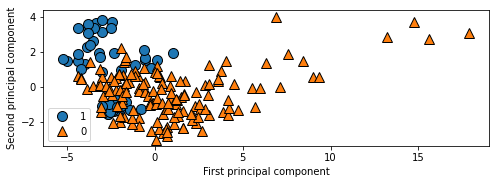

In [20]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mgl.discrete_scatter(X_pca[:, 0], X_pca[:, 1], status)
plt.legend(target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

<p style="font-size:18px">The model can distinguish the classes quite well.</p>

In [21]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 22)


In [22]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[-0.05333111  0.0067125  -0.06381942  0.25451324  0.24168069  0.24982357
   0.25652959  0.24981889  0.25999999  0.26177132  0.25337352  0.25237807
   0.25363841  0.25337496  0.23390771 -0.24205788  0.14673046  0.04101336
   0.2237074   0.15074127  0.15491943  0.2310616 ]
 [ 0.55340103  0.34878153  0.39548027  0.08178929 -0.07677255  0.11603792
   0.06810163  0.11604553  0.0525564   0.07626931  0.05891485  0.05008489
   0.0477631   0.05891577  0.17053785 -0.03706971 -0.24859482 -0.31078235
  -0.23931001 -0.20421777  0.13281137 -0.21395084]]


<p style="font-size:18px">Let's represent this components as a heat map.</p>

Text(0, 0.5, 'Principal components')

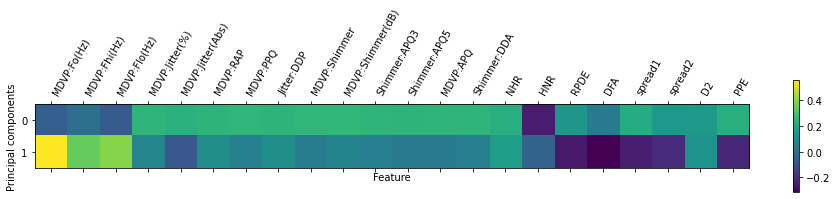

In [23]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["0", "1"])
plt.colorbar()
plt.xticks(range(len(feature_names_arr)),
           feature_names_arr, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

<p style="font-size:18px">As we can see, not all of the features correlate with each other</p>

<h3>Decision Trees</h3>

In [24]:
data_1=data.copy()

In [25]:
data_1.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [26]:
# dtree object
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)

In [27]:
# create X and y
X = data_1.drop("status", axis=1)
y = data_1["status"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.30, random_state=0)

In [29]:
dtree.fit(X_train, y_train)  # train Data

DecisionTreeClassifier(max_depth=3, random_state=0)

In [30]:
predictions = dtree.predict(X_test) # Prediction

In [31]:
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.956
Accuracy on test set: 0.864


<p style="font-size:18px">Accuracy of the training set achieved 95%, Accuracy of the test set achieved 86%.</p>

<h3>Analysis of the Decision Tree</h3>

In [32]:
from sklearn.tree import export_graphviz

In [33]:
export_graphviz(dtree, out_file="tree.dot", class_names=["1", "0"],
                feature_names=feature_names,
                impurity=False, filled=True)

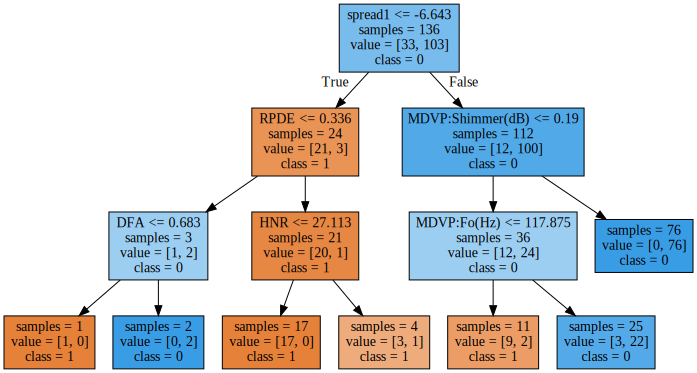

In [34]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [35]:
print("Feature importances:")
print(dtree.feature_importances_)

Feature importances:
[0.18649622 0.         0.         0.         0.         0.
 0.         0.         0.         0.13594346 0.         0.
 0.         0.         0.         0.01013614 0.05038256 0.03338962
 0.583652   0.         0.         0.        ]


In [36]:
data_1 = data_1.drop("status", axis=1)
data_1.shape

(195, 22)

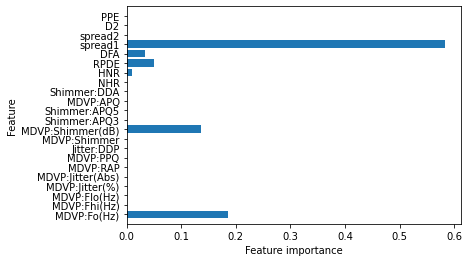

In [37]:
def plot_feature_importances_data(model):
    n_features = data_1.shape[1]  # here I set the number of features = columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_data(dtree) 

<p style="font-size:18px">We can clearly see that the feature "spread 1"  is by far the most important feature. Than come "MDVP:Fo(Hz)" and "MDVP: Schimmer(dB)" and the three more fetures, that we can see in the graph.</p> 

<h3>Random Forest Algorithm</h3>

In [38]:
rfc = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=60) 

In [39]:
rfc.fit(X_train, y_train) 

RandomForestClassifier(max_depth=3, n_estimators=60, random_state=0)

In [40]:
rfc_predict = rfc.predict(X_test)

In [41]:
print("Accuracy on training set: {:.3f}".format(rfc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rfc.score(X_test, y_test)))

Accuracy on training set: 0.963
Accuracy on test set: 0.746


<p style="font-size:18px">The accuracy of the train set has improved, but the test set shows worse results.</p>

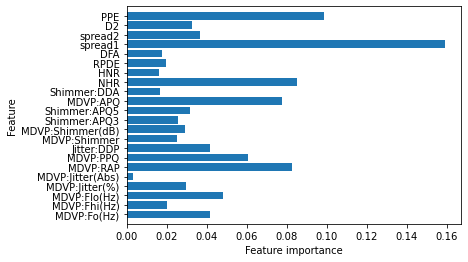

In [42]:
rfc = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=60) 
rfc.fit(X_train, y_train)

plot_feature_importances_data(rfc)

<p style="font-size:18px">"Spread 1" is also the most important feature here. We can see that Random Forest Algoritm considers many more features to be important. In the Decision Tree there were only 6.</p>

<h3>Gradient Boosting</h3>

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.971
Accuracy on test set: 0.847


<p style="font-size:18px">With low settings I can see the improvement in the train set.</p>

In [45]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.04, n_estimators=45)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.864


<p style="font-size:18px">The training set reached 99,3%, the accuracy of the test set shows no changes.</p>

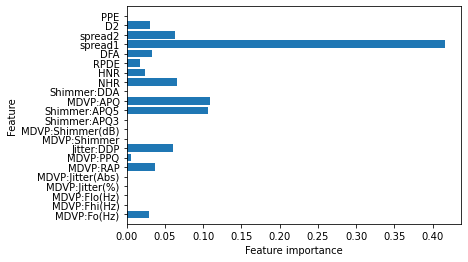

In [46]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_data(gbrt)

<p style="font-size:18px">The "spread 2" feature is also the most important for Gredient Boosting, but not every feature is considered important.</p>

<h3>Conclusion:</h3>
<p style="font-size:18px">For this dataset I used the algorithm Decision Tree. The tree was limited to 3 trees. The algorithms used showed improvement in the results of train set, but none in test set.</p>